### Análisis de victorias según jugador blanco o negro

In [3]:
import pandas as pd

df = pd.read_csv('data/chess_data.csv')

# identificadores únicos de jugadores
unique_players = set(df['white_id']).union(set(df['black_id']))

# Calcula la cantidad de jugadores distintos
num_unique_players = len(unique_players)

print(f"Número de jugadores distintos: {num_unique_players}")


Número de jugadores distintos: 15635


In [15]:


import pandas as pd

non_draw_games = df[df['winner'] != 'draw']

# Calcula el número total de partidas
total_games = df.shape[0]

# Calcula el número de partidas ganadas por el jugador blanco
white_wins = non_draw_games[non_draw_games['winner'] == 'white'].shape[0]

# Calcula el número de partidas ganadas por el jugador negro
black_wins = non_draw_games[non_draw_games['winner'] == 'black'].shape[0]

# Calcula el número de empates
draws = non_draw_games[non_draw_games['winner'] == 'draw'].shape[0]


print(f"Número total de partidas: {total_games}")
print(f"Número de partidas ganadas por el jugador blanco: {white_wins}")
print(f"Número de partidas ganadas por el jugador negro: {black_wins}")


Número total de partidas: 20058
Número de partidas ganadas por el jugador blanco: 10001
Número de partidas ganadas por el jugador negro: 9107


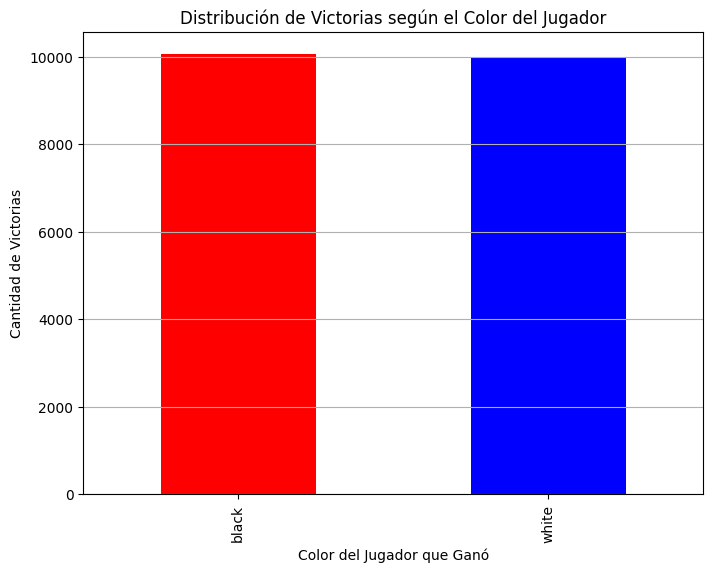

In [1]:
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv('data/chess_data.csv')

# Convertir 'created_at' a formato de fecha y hora
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Crear una columna para identificar al jugador que ganó
df['winning_color'] = df.apply(lambda row: 'white' if row['winner'] == 'white' else 'black', axis=1)

# Graficar la distribución de victorias por color en rojo y azul
plt.figure(figsize=(8, 6))
colors = df['winning_color'].map({'white': 'red', 'black': 'blue'})
df['winning_color'].value_counts().sort_index().plot(kind='bar', color=colors)
plt.title('Distribución de Victorias según el Color del Jugador')
plt.xlabel('Color del Jugador que Ganó')
plt.ylabel('Cantidad de Victorias')
plt.grid(axis='y')
plt.show()

Por un lado, analizando la distribución de victorias según el jugador vemos que el jugador negro y blanco están muy equilibrados, aunque el negro, suele tener un ligero número mayor de victorias.

## Análisis de la duración de las partidas

count    20058.000000
mean        14.495117
std         80.237035
min          0.000000
25%          0.000000
50%          4.010200
75%         13.219521
max      10097.411683
Name: duration_minutes, dtype: float64


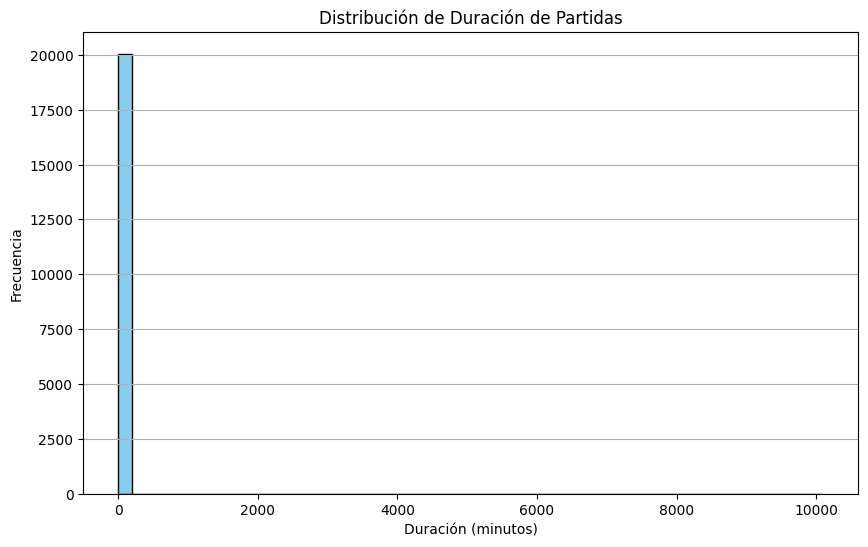

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertir las columnas a tipo datetime si aún no lo son
df['last_move_at'] = pd.to_datetime(df['last_move_at'], unit='ms')
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Calcular la duración de las partidas en minutos
df['duration_minutes'] = (df['last_move_at'] - df['created_at']).dt.total_seconds() / 60

# Imprimir algunas estadísticas sobre la columna 'duration_minutes'
print(df['duration_minutes'].describe())

# distribución de la duración de las partidas
plt.figure(figsize=(10, 6))
plt.hist(df['duration_minutes'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de Duración de Partidas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

Las estadísticas que proporciona indican que la mayoría de las partidas tienen una duración relativamente corta, pero hay algunas partidas con duraciones muy largas que están afectando significativamente la media y la desviación estándar.

Dado que la duración máxima es extremadamente grande (más de 10000 minutos), es posible que haya outliers que estén distorsionando la visualización del histograma. Podemos considerar filtrar esos valores extremos y luego volver a graficar.

count    19256.000000
mean         7.518351
std         11.055117
min          0.000000
25%          0.000000
50%          3.043975
75%         11.967212
max         99.816000
Name: duration_minutes, dtype: float64


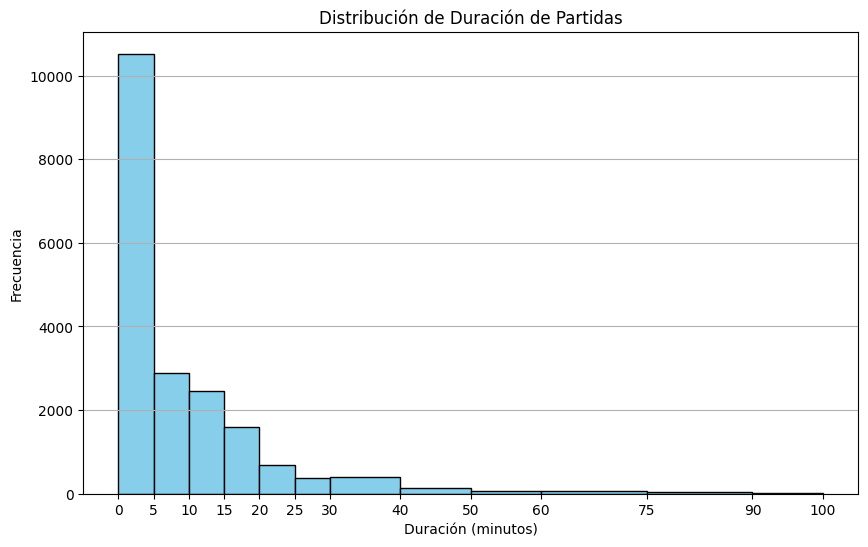

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertir las columnas a tipo datetime si aún no lo son
df['last_move_at'] = pd.to_datetime(df['last_move_at'], unit='ms')
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Calcular la duración de las partidas en minutos
df['duration_minutes'] = (df['last_move_at'] - df['created_at']).dt.total_seconds() / 60

# Filtrar las duraciones mayores a un umbral (por ejemplo, 100 minutos)
df_filtered = df[df['duration_minutes'] < 100]

# Imprimir algunas estadísticas sobre la columna 'duration_minutes'
print(df_filtered['duration_minutes'].describe())

# Definir los intervalos deseados
bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 75, 90, 100]

# Graficar la distribución de la duración de las partidas
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['duration_minutes'], bins=bins, color='skyblue', edgecolor='black')
plt.title('Distribución de Duración de Partidas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.xticks(bins)  
plt.grid(axis='y')
plt.show()


Como vemos, la duración de las partidas tiende a concentrarse en los 5 minutos.

### Medias de partidas jugadas por cada jugador

In [4]:
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv('data/chess_data.csv')

# Crear una columna 'total_partidas' que contenga la suma de partidas jugadas por cada jugador
df['total_partidas'] = df.groupby('white_id')['white_id'].transform('count') + df.groupby('black_id')['black_id'].transform('count')

# Calcular la media de partidas jugadas por cada jugador
media_total_partidas = df['total_partidas'].mean()
print(f'Media de partidas jugadas por cada jugador: {media_total_partidas:.2f}')

# Filtrar jugadores con más de 10 partidas
df_filtrado = df[df['total_partidas'] > 10]

# Calcular la media de partidas jugadas por cada jugador con más de 10 partidas
media_partidas_mas_10 = df_filtrado['total_partidas'].mean()
print(f'Media de partidas jugadas por cada jugador con más de 10 partidas: {media_partidas_mas_10:.2f}')


Media de partidas jugadas por cada jugador: 18.10
Media de partidas jugadas por cada jugador con más de 10 partidas: 22.37


## Análisis de jugadores más activos según el número de partidas jugadas


/tmp/ipykernel_22729/4098228091.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.values, y=top_players.index, palette='pastel')


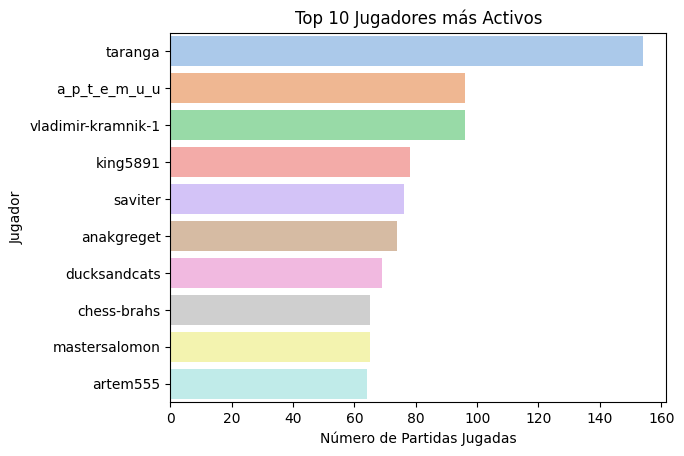

In [5]:
import seaborn as sns

# Gráfico de barras de los jugadores más activos
top_players = pd.concat([df['white_id'], df['black_id']]).value_counts().head(10)
sns.barplot(x=top_players.values, y=top_players.index, palette='pastel')
plt.title('Top 10 Jugadores más Activos')
plt.xlabel('Número de Partidas Jugadas')
plt.ylabel('Jugador')
plt.show()


### Medias de partidas jugadas por cada jugador

In [1]:
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv('data/chess_data.csv')

# Crear una columna 'total_partidas' que contenga la suma de partidas jugadas por cada jugador
df['total_partidas'] = df.groupby('white_id')['white_id'].transform('count') + df.groupby('black_id')['black_id'].transform('count')

# Calcular la media de partidas jugadas por cada jugador
media_total_partidas = df['total_partidas'].mean()
print(f'Media de partidas jugadas por cada jugador: {media_total_partidas:.2f}')

# Filtrar jugadores con más de 10 partidas
df_filtrado = df[df['total_partidas'] > 10]

# Calcular la media de partidas jugadas por cada jugador con más de 10 partidas
media_partidas_mas_10 = df_filtrado['total_partidas'].mean()
print(f'Media de partidas jugadas por cada jugador con más de 10 partidas: {media_partidas_mas_10:.2f}')

Media de partidas jugadas por cada jugador: 18.10
Media de partidas jugadas por cada jugador con más de 10 partidas: 22.37


## Análisis de jugadores con mejores resultados

/tmp/ipykernel_44468/2404369757.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_players.index, y=best_players.values, palette='coolwarm')


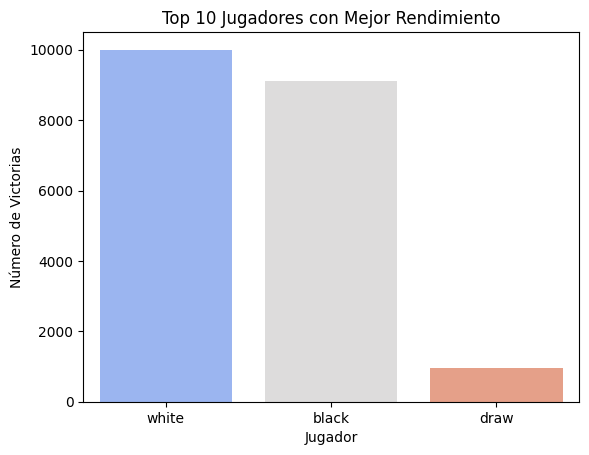

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Gráfico de barras de los jugadores con mejor rendimiento
best_players = df['winner'].value_counts().head(10)
sns.barplot(x=best_players.index, y=best_players.values, palette='coolwarm')
plt.title('Top 10 Jugadores con Mejor Rendimiento')
plt.xlabel('Jugador')
plt.ylabel('Número de Victorias')
plt.show()

## Análisis mejores jugadores y partidas jugadas

/tmp/ipykernel_14006/1744853470.py:18: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  top_players_results.plot(kind='bar', figsize=(12, 6), colormap='viridis', color=['black', 'gray', 'white'],edgecolor='black')
/tmp/ipykernel_14006/1744853470.py:18: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  top_players_results.plot(kind='bar', figsize=(12, 6), colormap='viridis', color=['black', 'gray', 'white'],edgecolor='black')


AttributeError: 'Series' object has no attribute 'set_color'

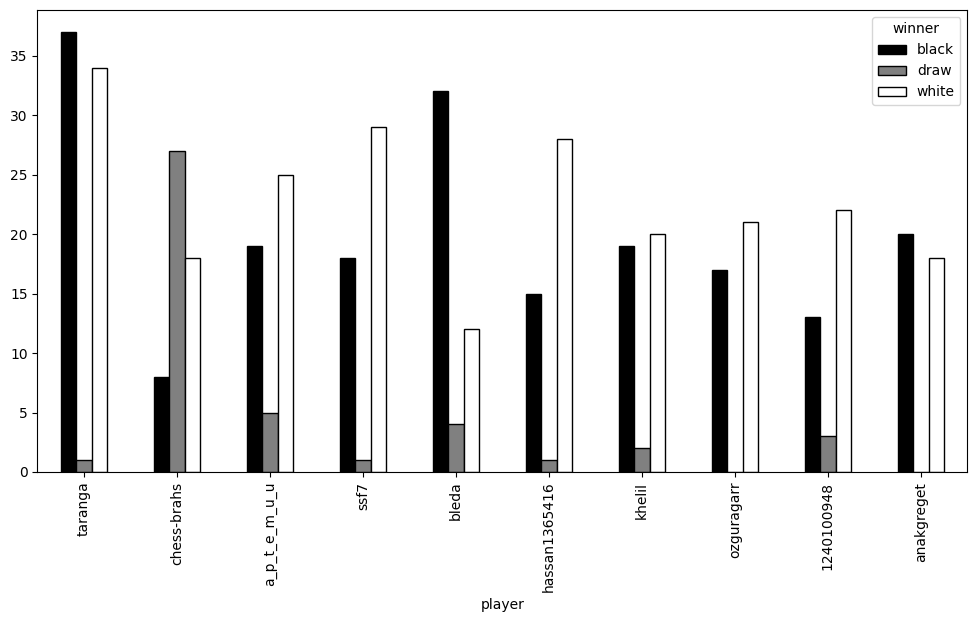

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combina las columnas 'white_id' y 'black_id' en una única columna 'player'
df['player'] = df['white_id'].fillna(df['black_id'])

# Cuenta las victorias, derrotas y empates para cada jugador
results_by_player = df.groupby('player')['winner'].value_counts().unstack(fill_value=0)

# Obtiene los nombres de los 10 mejores jugadores
top_players_names = df['player'].value_counts().head(10).index

# Filtra los resultados para los 10 mejores jugadores
top_players_results = results_by_player.loc[top_players_names]

# Crea un gráfico de barras agrupadas
top_players_results.plot(kind='bar', figsize=(12, 6), colormap='viridis', color=['black', 'gray', 'white'],edgecolor='black')

# Cambia el color de la columna de empate
top_players_results['draw'].set_color('gray')

# Cambia el color de la columna de negro
top_players_results['black'].set_color('black')

# Cambia el color de la columna de blanco
top_players_results['white'].set_color('white')

plt.title('Resultados de las Partidas para los 10 Mejores Jugadores')
plt.xlabel('Jugador')
plt.ylabel('Número de Partidas')
plt.legend(title='Resultado', loc='upper right', labels=['Empate', 'Negro', 'Blanco'])
plt.show()


## Número de aperturas 

In [1]:
import pandas as pd

df = pd.read_csv('data/chess_data.csv')
# Contar las aperturas distintas
conteo_aperturas = df['opening_name'].nunique()
aperturas_distintas = df['opening_name'].unique()

print(f"Total de aperturas distintas: {conteo_aperturas}")
print("Aperturas distintas:")
for apertura in aperturas_distintas:
    print(f"- {apertura}")


Total de aperturas distintas: 1477
Aperturas distintas:
- Slav Defense: Exchange Variation
- Nimzowitsch Defense: Kennedy Variation
- King's Pawn Game: Leonardis Variation
- Queen's Pawn Game: Zukertort Variation
- Philidor Defense
- Sicilian Defense: Mongoose Variation
- Blackmar-Diemer Gambit: Pietrowsky Defense
- Nimzowitsch Defense: Kennedy Variation |  Linksspringer Variation
- Italian Game: Schilling-Kostic Gambit
- Scandinavian Defense: Mieses-Kotroc Variation
- Van't Kruijs Opening
- French Defense: Advance Variation |  Paulsen Attack
- French Defense: Knight Variation
- French Defense #2
- Four Knights Game: Italian Variation
- Italian Game: Two Knights Defense |  Knight Attack
- Philidor Defense #3
- Queen's Pawn Game
- Italian Game: Anti-Fried Liver Defense
- Horwitz Defense
- Sicilian Defense: Bowdler Attack
- English Opening: King's English Variation |  Reversed Closed Sicilian
- Sicilian Defense: Smith-Morra Gambit #2
- Queen's Pawn Game: Chigorin Variation
- Scotch Game: